In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" *user *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\bifurcation\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\bifurcation`


In [6]:
using BifurcationKit, LinearAlgebra, Plots, Parameters, JLD2
const BK = BifurcationKit

BifurcationKit

In [8]:
Pkg.status()

Status `C:\Users\Alex\Desktop\dynamical-systems\env\bifurcation\Project.toml`
  [0f109fa4] BifurcationKit v0.2.9
  [0e751702] HclinicBifurcationKit v0.1.0 `https://github.com/bifurcationkit/HclinicBifurcationKit.jl#main`
  [4138dd39] JLD v0.13.3
  [033835bb] JLD2 v0.4.33
  [23992714] MAT v0.10.5
  [d96e819e] Parameters v0.12.3
  [91a5bcdd] Plots v1.38.17
  [efcf1570] Setfield v1.1.1


In [9]:
τ_ = 0.013; τD_ = 0.07993;  τy_ = 3.3; J_ = 3.07; β_ = 0.300
xthr_ = 0.75; ythr_ = 0.4
α_ = 1.58; ΔU0_ = 0.305
I0_ = -1.7064; U0_ = 0.265; 

@inbounds function TM_bk!(du, u, p, t = 0)
    U_ = p[8] + p[9] / ( 1.0 + exp( -50.0 * (u[3] - p[7]) ) )
    σ = 1.0 / ( 1.0 + exp( -20.0 * (u[2]-p[6]) ) )
    g(E, x, y, p, U_) = log( 1.0 + exp( (p[5] * U_ * x * E + p[11]  ) / (p[1]) ) )
    
    du[1] = (-u[1] + p[1] * g(u[1], u[2], u[3], p, U_) ) / p[2]
    du[2] = (1.0 - u[2]) / p[3] - U_*u[2]*u[1]
    du[3] = (-u[3])/p[4] + p[10] * σ
    
    return du
end

TM_bk! (generic function with 2 methods)

In [10]:
TM_bk(u, p) = TM_bk!(similar(u), u, p, 0)

p_tm = (α = α_, τ = τ_, τD = τD_, τy = τy_, J = J_, xthr = xthr_, ythr = ythr_, U0 = U0_, ΔU0 = ΔU0_, β = β_, I0 = I0_)
fp0 = [ 8.34581,  0.738495,  0.438299];

prob =  BifurcationProblem(TM_bk, fp0, p_tm, (@lens _.I0))

opt_new = NewtonPar(maxIter = 3, tol = 1e-6)
pmax, pmin = 0.0, -1.74

opts_con = ContinuationPar(pMin = pmin, pMax = pmax,
                            ds = 0.001, dsmin = 1e-5, dsmax = 0.1,
                            nev = 3, detectBifurcation = 3, newtonOptions  = opt_new,
                            maxSteps  = 300, nInversion = 6)

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 1.0e-5
  dsmax: Float64 0.1
  ds: Float64 0.001
  a: Float64 0.5
  pMin: Float64 -1.74
  pMax: Float64 0.0
  maxSteps: Int64 300
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 1
  nev: Int64 3
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  tolStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 3
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 6
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


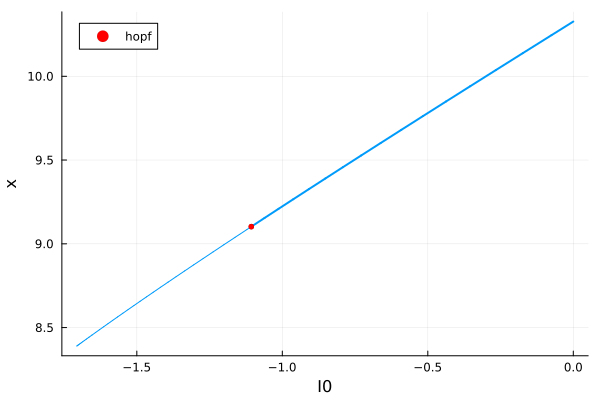

In [11]:
br = continuation(prob, PALC(), opts_con)

plot(br)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────

━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━


──▶ convergence of initial guess = OK

──▶ parameter = 0.265, initial step

━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━


──▶ convergence of the initial guess = OK

──▶ parameter = 0.26500666666666667, initial step (bis)


Predictor:  Secant


───────────────────────────────────────────────────────
Continuation Step 0 
Step size = 1.0000e-03


Parameter U0 = 2.6500e-01 ⟶  2.6508e-01 [guess]


──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0

 = 2.6500e-01 ⟶  2.6508e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.201638308453745, -0.1554443903466805, 0)
              ──> (16.204670354929423, -0.15536291725154225, 0)


───────────────────────────────────────────────────────
Continuation Step 1 
Step size = 1.2222e-03
Parameter U0 = 2.6508e-01 ⟶  2.6517e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6508e-01 ⟶  2.6517e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.204670354929423, -0.15536291725154225, 0)
              ──> (16.20837571399167, -0.1552634966422905, 0)
───────────────────────────────────────────────────────
Continuation Step 2 
Step size = 1.4938e-03
Parameter U0 = 2.6517e-01 ⟶  2.6528e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6517e-01 ⟶  2.6528e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.20837571399167, -0.1552634966422905, 0)
              ──> (16.212904334887664, -0.15514209987500982, 0)
───────────────────────────────────────────────────────
Continuation Step 3 
Step size = 1.8258e-03
Parameter U0 = 2.6528e-0

Step size = 1.6861e-02
Parameter U0 = 2.7515e-01 ⟶  2.7682e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.7515e-01 ⟶  2.7690e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.551670832978427, -0.146361112934238, 0)
              ──> (16.602593124241896, -0.1450798681251697, 0)
───────────────────────────────────────────────────────
Continuation Step 18 
Step size = 1.7797e-02
Parameter U0 = 2.7690e-01 ⟶  2.7875e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)


Parameter U0 = 2.7690e-01 ⟶  2.7884e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.602593124241896, -0.1450798681251697, 0)
              ──> (16.65630484652338, -0.14373425023033737, 0)
───────────────────────────────────────────────────────
Continuation Step 19 
Step size = 1.8786e-02
Parameter U0 = 2.7884e-01 ⟶  2.8089e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.7884e-01 ⟶  2.8101e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.65630484652338, -0.14373425023033737, 0)
              ──> (16.712951411864417, -0.14231869995337892, 0)
───────────────────────────────────────────────────────
Continuation Step 20 
Step size = 1.9830e-02
Parameter U0 = 2.8101e-01 ⟶  2.8330e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.8101e-01 ⟶  2.8344e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> 

───────────────────────────────────────────────────────
Continuation Step 33 
Step size = 4.2564e-03
Parameter U0 = 3.4979e-01 ⟶  3.5442e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.4979e-01 ⟶  3.5378e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.363743511505614, -0.11759085679477477, 0)
              ──> (17.35447270811856, -0.11657954832219306, 0)
───────────────────────────────────────────────────────
Continuation Step 34 
Step size = 4.4929e-03
Parameter U0 = 3.5378e-01 ⟶  3.5779e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.5378e-01 ⟶  3.5719e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.35447270811856, -0.11657954832219306, 0)
              ──> (17.343466785225264, -0.11571418762805533, 0)
───────────────────────────────────────────────────────
Continuation Step 35 
Step size = 4.7425e-03
Parameter U0 = 3.57

Parameter U0 = 3.6594e-01 ⟶  3.6860e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.30290736275323, -0.1134813114536729, 0)
              ──> (17.287179667216545, -0.11279281547846233, 0)
───────────────────────────────────────────────────────
Continuation Step 39 
Step size = 5.8875e-03
Parameter U0 = 3.6860e-01 ⟶  3.7140e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.6860e-01 ⟶  3.7119e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.287179667216545, -0.11279281547846233, 0)
              ──> (17.27037257338063, -0.11211514706040873, 0)
───────────────────────────────────────────────────────
Continuation Step 40 
Step size = 6.2145e-03
Parameter U0 = 3.7119e-01 ⟶  3.7392e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.7119e-01 ⟶  3.7373e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> 

Step size = 8.5960e-03
Parameter U0 = 3.8622e-01 ⟶  3.8887e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.8622e-01 ⟶  3.8874e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.144986723397395, -0.10798608129547768, 0)
              ──> (17.119514649773038, -0.10725176418847004, 0)
───────────────────────────────────────────────────────
Continuation Step 47 
Step size = 9.0735e-03
Parameter U0 = 3.8874e-01 ⟶  3.9140e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.8874e-01 ⟶  3.9128e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.119514649773038, -0.10725176418847004, 0)
              ──> (17.092561442639308, -0.10649546231789889, 0)
───────────────────────────────────────────────────────
Continuation Step 48 
Step size = 9.5776e-03
Parameter U0 = 3.9128e-01 ⟶  3.9397e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)


───────────────────────────────────────────────────────
Continuation Step 0 
Step size = -1.0000e-03
Parameter U0 = 2.6500e-01 ⟶  2.6492e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6500e-01 ⟶  2.6492e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.201638308453745, -0.1554443903466805, 0)
              ──> (16.19860675805195, -0.15552579392972796, 0)
───────────────────────────────────────────────────────
Continuation Step 1 
Step size = -1.2222e-03
Parameter U0 = 2.6492e-01 ⟶  2.6483e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6492e-01 ⟶  2.6483e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.19860675805195, -0.15552579392972796, 0)
              ──> (16.194901107929844, -0.1556254439314, 0)
───────────────────────────────────────────────────────
Continuation Step 2 
Step size = -1.4938e-03
Parameter U0 = 2.6483e-0

Predictor:  Secant
──> Event values: (15.988639801480028, -0.16131464904689835, 0)
              ──> (15.93822602020979, -0.16275098143706246, 0)
───────────────────────────────────────────────────────
Continuation Step 15 
Step size = -2.0289e-02
Parameter U0 = 2.5896e-01 ⟶  2.5765e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.5896e-01 ⟶  2.5770e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (15.93822602020979, -0.16275098143706246, 0)
              ──> (15.876586927468589, -0.16453346133624164, 0)
───────────────────────────────────────────────────────
Continuation Step 16 
Step size = -2.1416e-02
Parameter U0 = 2.5770e-01 ⟶  2.5637e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.5770e-01 ⟶  2.5642e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (15.876586927468589, -0.16453346133624164, 0)
              ──> (15.8114978773566


──> Event values: (14.823122740471772, -0.20032744442153777, 0)
              ──> (14.648690097744868, -0.20734625615562524, 0)
───────────────────────────────────────────────────────
Continuation Step 27 
Step size = -6.0261e-02
Parameter U0 = 2.4037e-01 ⟶  2.3850e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.4037e-01 ⟶  2.3868e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.648690097744868, -0.20734625615562524, 0)
              ──> (14.464440045336207, -0.21511704820583238, 0)
───────────────────────────────────────────────────────
Continuation Step 28 
Step size = -7.3652e-02
Parameter U0 = 2.3868e-01 ⟶  2.3662e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.3868e-01 ⟶  2.3685e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.464440045336207, -0.21511704820583238, 0)
              ──> (14.239075471795383, -0.225116330

Parameter U0 = 2.3225e-01 ⟶  2.3103e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (13.483823311405754, -0.26212305603173186, 0)
              ──> (13.203180679510105, -0.2767880643252987, 0)
───────────────────────────────────────────────────────
Continuation Step 33 
Step size = -9.6514e-02
Parameter U0 = 2.3103e-01 ⟶  2.2973e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.3103e-01 ⟶  2.2995e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (13.203180679510105, -0.2767880643252987, 0)
              ──> (12.90674889875189, -0.2922544787492216, 0)
───────────────────────────────────────────────────────
Continuation Step 34 
Step size = -1.0000e-01
Parameter U0 = 2.2995e-01 ⟶  2.2884e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.2995e-01 ⟶  2.2904e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──>

────> Entering [Event], indicator of 2 last events = ((2, 0), (1, 0))
────> [Bisection] initial ds = -0.1
────> [Bisection] state.ds = 0.1
──> eve (initial) (10.457819856800302, -0.1136558631022988, 0) ──> (10.15958472464819, 0.02916116952953407, 0)

──> eigvals = 


-1.363828477929374e-7 - 10.159584797372556im
-1.363828477929374e-7 + 10.159584797372556im
-0.4328867344594442 + 0.0im

────> eve (current) (10.15958472464819, 0.02916116952953407, 0) ──> (10.15958472464819, 0.02916116952953407, 0)
────> eigvals = 
-1.363828477929374e-7 - 10.159584797372556im
-1.363828477929374e-7 + 10.159584797372556im
-0.4328867344594442 + 0.0im


────> 0 - [Bisection] (n1, n_current, n2) = ((1, 0), (2, 0), (2, 0))
			ds = 0.05, p = 0.22121769599317634, #reverse = 0
────> event ∈ (0.22121769599317634, 0.22313517368663638), precision = 1.917E-03
Predictor:  Secant

────> eve (current) (10.15958472464819, 0.02916116952953407, 0) ──> (10.308009624783864, -0.044118089360172086, 0)
────> eigvals = 
-5.7586602153492095e-11 - 10.308009624809888im
-5.7586602153492095e-11 + 10.308009624809888im
-0.4901597156240403 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((1, 0), (1, 0), (2, 0))
			ds = -0.025, p = 0.22223638812307098, #reverse = 1
────> event ∈ (0.22121769599317634, 0.22223638812307098), precision = 1.019E-03
Predictor:  Secant

────> eve (current) (10.308009624783864, -0.044118089360172086, 0) ──> (10.23367192737185, -0.007569391075105125, 0)
────> eigvals = 
-9.703349235223868e-14 - 10.23367192737191im
-9.703349235223868e-14 + 10.23367192737191im
-0.4595221112571246 + 0.0im
────> 2 - [Bisection] (n1, n_current, n2) = ((1, 0

────> Found at p = 0.22163354833461535 ∈ (0.22163354833461535, 0.22163757748651672), 
			  δn = (1, 0), from p = 0.22121769599317634
────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = false
──────> n_inversion >= nInversion = true
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.22163354833461535 
───────────────────────────────────────────────────────
Continuation Step 43 
Step size = -1.0000e-01
Parameter U0 = 2.2163e-01 ⟶  2.1957e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.2163e-01 ⟶  2.1937e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (10.218023776753865, 0.00019210613553760636, 0)
              ──> (9.923290577719259, 0.13867551104444753, 0)
───────────────────────────────────────────────────────
Continuation Step 4

Parameter U0 = 1.8986e-01 ⟶  1.8847e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8986e-01 ⟶  1.8858e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (5.798330432807205, 0.5323760321510023, 0)
              ──> (5.496154705355952, 0.5642065509961447, 0)
───────────────────────────────────────────────────────
Continuation Step 59 
Step size = -1.0000e-01
Parameter U0 = 1.8858e-01 ⟶  1.8729e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8858e-01 ⟶  1.8740e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant


──> Event values: (5.496154705355952, 0.5642065509961447, 0)
              ──> (5.192831534536277, 0.6015743532289068, 0)
───────────────────────────────────────────────────────
Continuation Step 60 
Step size = -1.0000e-01
Parameter U0 = 1.8740e-01 ⟶  1.8623e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8740e-01 ⟶  1.8633e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (5.192831534536277, 0.6015743532289068, 0)
              ──> (4.8883641486909335, 0.6460973602994442, 0)
───────────────────────────────────────────────────────
Continuation Step 61 
Step size = -1.0000e-01
Parameter U0 = 1.8633e-01 ⟶  1.8526e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8633e-01 ⟶  1.8536e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (4.8883641486909335, 0.6460973602994442, 0)
              ──> (4.582761806336621, 0.6999736238404948, 0)
───

──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.5246284963271705, 35.94033818122074, 0)
              ──> (0.20842113906830723, 226.8725302778828, 0)
───────────────────────────────────────────────────────
Continuation Step 76 
Step size = -1.0000e-01
Parameter U0 = 1.7989e-01 ⟶  1.7985e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.7989e-01 ⟶  1.7989e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.20842113906830723, 226.8725302778828, 0)
              ──> (-0.10786317059775413, 847.0170880839596, 0)
──> Event detected before p = 0.17988857781847814
────> Entering [Event], indicator of 2 last events = ((1, 0), (2, 0))
────> [Bisection] initial ds = -0.1
────> [Bisection] state.ds = 0.1
──> eve (initial) (0.20842113906830723, 226.8725302778828, 0) ──> (-0.10786317059775413, 847.0170880839596, 0)

──> eigvals = 
-2.113144560592431e-11 - 0.10786317378284965i

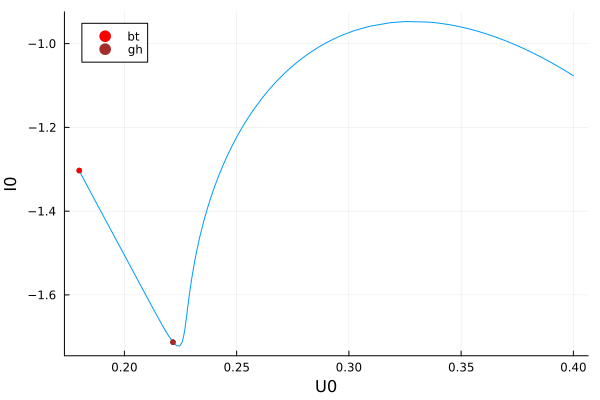

In [12]:
hp_codim2_1 = continuation(br, 1, (@lens _.U0),
    ContinuationPar(opts_con, pMin = 0.0, pMax = 0.4,
        ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
    # detection of codim 2 bifurcations with bisection
    detectCodim2Bifurcation = 2,
    # tell to start the Hopf problem using eigen elements: compute left eigenvector
    startWithEigen = true,
    # we update the Hopf problem at every continuation step
    updateMinAugEveryStep = 1,
    # compute both sides of the initial condition
    bothside = true,
    verbosity = 3
    )
plot(hp_codim2_1)

In [15]:
sn_codim2_1 = continuation(hp_codim2_1, 2,
    ContinuationPar(opts_con, pMin = 0.0, pMax = 0.4,
        ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
    # detection of codim 2 bifurcations with bisection
    detectCodim2Bifurcation = 2,
    # tell to start the Hopf problem using eigen elements: compute left eigenvector
    startWithEigen = true,
    # we update the Hopf problem at every continuation step
    updateMinAugEveryStep = 1,
    # compute both sides of the initial condition
    bothside = true,
    verbosity = 3
    )

--> Considering bifurcation point:
- #  2,       bt at p ≈ +0.17988646 ∈ (+0.17988744, +0.17988749), |δp|=5e-08, [converged], δ = ( 0,  0), step =   0, eigenelements in eig[  1], ind_ev =   0
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
──▶ Bogdanov-Takens Normal form computation
────▶ eigenvalues = ComplexF64[-2.9036862215158724e-7 - 0.075219043021921im, -2.9036862215158724e-7 + 0.075219043021921im]
(a = -21.32553578686826, b = -0.9238861078895382)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────

━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━
──▶ convergence of initial guess = OK

──▶ parameter = 0.17989515082833693, initial step

━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━
──▶ convergence of the initial guess = OK

──▶ parameter = 0.17990181749500359, initial step (bis)
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 0 
Step size = 1.0000e-03
Parameter U0 = 1.79

Predictor:  Secant
──> Event values: (-0.0008595509041386494, 0.07821329650474174, 0)
              ──> (-0.0010576653795633826, 0.0796009901584812, 0)
───────────────────────────────────────────────────────
Continuation Step 14 
Step size = 1.6600e-02
Parameter U0 = 1.8526e-01 ⟶  1.8658e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.8526e-01 ⟶  1.8661e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 2
Predictor:  Secant
──> Event values: (-0.0010576653795633826, 0.0796009901584812, 0)
              ──> (-0.0012959577245035445, 0.08127626587182085, 0)
───────────────────────────────────────────────────────
Continuation Step 15 
Step size = 2.0289e-02
Parameter U0 = 1.8661e-01 ⟶  1.8825e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.8661e-01 ⟶  1.8830e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.0012959577245035445, 0.08127626587182085, 0)
              ──> (-0.

 = 1.8830e-01 ⟶  1.9013e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.0015815904506200366, 0.08329394576235358, 0)
              ──> (-0.0018765663483719648, 0.08553712542179467, 0)
───────────────────────────────────────────────────────
Continuation Step 17 
Step size = 2.2606e-02
Parameter U0 = 1.9013e-01 ⟶  1.9206e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.9013e-01 ⟶  1.9211e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.0018765663483719648, 0.08553712542179467, 0)
              ──> (-0.0021808684095389838, 0.08786308585926168, 0)
───────────────────────────────────────────────────────
Continuation Step 18 
Step size = 2.3861e-02
Parameter U0 = 1.9211e-01 ⟶  1.9421e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.9211e-01 ⟶  1.9427e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
─

U0 = 2.1164e-01 ⟶  2.1547e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.004566074325647512, 0.10665353941053153, 0)
              ──> (-0.004943900133038013, 0.10973395917305943, 0)
───────────────────────────────────────────────────────
Continuation Step 26 
Step size = 3.6774e-02
Parameter U0 = 2.1547e-01 ⟶  2.1950e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.1547e-01 ⟶  2.1962e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.004943900133038013, 0.10973395917305943, 0)
              ──> (-0.005334681436841041, 0.11293243888416458, 0)
───────────────────────────────────────────────────────
Continuation Step 27 
Step size = 3.8817e-02
Parameter U0 = 2.1962e-01 ⟶  2.2400e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.1962e-01 ⟶  2.2413e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──>

──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.08172866128873499, 0.23209909022480918, 0)
              ──> (-0.10366877662248149, 0.22187650443063145, 0)
───────────────────────────────────────────────────────
Continuation Step 36 
Step size = 5.6675e-02
Parameter U0 = 2.9458e-01 ⟶  3.0715e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 2.9458e-01 ⟶  3.0691e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.10366877662248149, 0.22187650443063145, 0)
              ──> (-0.1140708624681598, 0.21596321760345677, 0)
───────────────────────────────────────────────────────
Continuation Step 37 
Step size = 5.6675e-02
Parameter U0 = 3.0691e-01 ⟶  3.1915e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 3.0691e-01 ⟶  3.1912e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 1
Predictor:  Secant
──> Event values: (-0.1140708624681598

 = 1.7990e-01 ⟶  1.7982e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7990e-01 ⟶  1.7982e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (-1.87677381045863e-6, 0.07229462724127231, 0)
              ──> (1.3748678469946474e-5, 0.07224248467596416, 0)
──> Event detected before p = 0.17982290834119755
────> Entering [Event], indicator of 2 last events = ((2, 0), (1, 0))
────> [Bisection] initial ds = -0.0012222222222222224
────> [Bisection] state.ds = 0.0012222222222222224
──> eve (initial) (-1.87677381045863e-6, 0.07229462724127231, 0) ──> (1.3748678469946474e-5, 0.07224248467596416, 0)

──> eigvals = 
-7.53085413474075e-10 + 0.0im
-0.007576727502805303 + 0.0im
-0.3030401181934915 + 0.0im

────> eve (current) (1.3748678469946474e-5, 0.07224248467596416, 0) ──> (1.3748678469946474e-5, 0.07224248467596416, 0)
────> eigvals = 
-7.53085413474075e-10 + 0.0im
-0.007576727502805303 + 0.0im
-0.3030401181934915 + 0.0

-0.0009427594528171462 + 0.0im
-0.303039986472471 + 0.0im
────> 8 - [Bisection] (n1, n_current, n2) = ((1, 0), (1, 0), (2, 0))
			ds = -2.387152777777778e-6, p = 0.17988671050529667, #reverse = 3
────> event ∈ (0.17988636544903164, 0.17988671050529667), precision = 3.451E-07
Predictor:  Secant

────> eve (current) (-5.348033557246855e-8, 0.07227360315383201, 0) ──> (-1.6206339162338197e-8, 0.07227360315422857, 0)
────> eigvals = 
0.0009911033204642317 + 0.0im
-0.000982181125029638 + 0.0im
-0.3030399868238156 + 0.0im
────> 9 - [Bisection] (n1, n_current, n2) = ((1, 0), (1, 0), (2, 0))
			ds = -1.193576388888889e-6, p = 0.17988653797716414, #reverse = 3
────> event ∈ (0.17988636544903164, 0.17988653797716414), precision = 1.725E-07
Predictor:  Secant

────> eve (current) (-1.6206339162338197e-8, 0.07227360315422857, 0) ──> (2.4307770170633584e-9, 0.07227360315237344, 0)
────> eigvals = 
0.0010000424768264182 + 0.0im
-0.0010013983580032804 + 0.0im
-0.3030399869994808 + 0.0im
────> 10 - [B

──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (4.248498177766045e-5, 0.0720534789492369, 0)
              ──> (7.111487289692679e-5, 0.0718559892194342, 0)
───────────────────────────────────────────────────────
Continuation Step 4 
Step size = -2.2315e-03
Parameter U0 = 1.7956e-01 ⟶  1.7940e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7956e-01 ⟶  1.7940e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (7.111487289692679e-5, 0.0718559892194342, 0)
              ──> (0.00010618444677859842, 0.07161417248623812, 0)
───────────────────────────────────────────────────────
Continuation Step 5 
Step size = -2.7274e-03
Parameter U0 = 1.7940e-01 ⟶  1.7920e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7940e-01 ⟶  1.7921e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.00010618444677859

───────────────────────────────────────────────────────
Continuation Step 14 
Step size = -1.6600e-02
Parameter U0 = 1.7517e-01 ⟶  1.7410e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 1.7517e-01 ⟶  1.7413e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.00112293088157785, 0.06464348774894732, 0)
              ──> (0.001405373519866071, 0.06271892214618202, 0)
───────────────────────────────────────────────────────
Continuation Step 15 
Step size = -2.0289e-02
Parameter U0 = 1.7413e-01 ⟶  1.7286e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.7413e-01 ⟶  1.7291e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.001405373519866071, 0.06271892214618202, 0)
              ──> (0.0017578200911805798, 0.06032300923496743, 0)
───────────────────────────────────────────────────────
Continuation Step 16 
Step size = -2.1416e-02
Parameter 

──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.6187e-01 ⟶  1.6172e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.008423963198816995, 0.01151118783130101, 0)
              ──> (0.009447425527998913, 0.003843816665838444, 0)
───────────────────────────────────────────────────────
Continuation Step 28 
Step size = -4.0974e-02
Parameter U0 = 1.6172e-01 ⟶  1.6157e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.6172e-01 ⟶  1.6192e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.009447425527998913, 0.003843816665838444, 0)
              ──> (0.010586732301182776, -0.0047687644568623596, 0)
──> Event detected before p = 0.16191989190243658
────> Entering [Event], indicator of 2 last events = ((1, 0), (2, 0))
────> [Bisection] initial ds = -0.04325018581702812
────> [Bisection] state.ds = 0.04325018581702812
──> eve (initial) (0.009447425527998

2.872368498244731e-6 + 0.0im
-0.30303029427986217 + 0.0im
-3.525253716182722 + 0.0im
────> 9 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (1, 0))
			ds = -4.2236509586941526e-5, p = 0.16172428245553988, #reverse = 1
────> event ∈ (0.16172428117084037, 0.16172428245553988), precision = -1.285E-09
Predictor:  Secant

────> eve (current) (0.009420573552206707, 1.5208369689838818e-5, 0) ──> (0.009421715378730175, 1.520836968983929e-5, 0)
────> eigvals = 
1.5384703106534705e-6 + 0.0im
-0.3030302942833503 + 0.0im
-3.525539502141239 + 0.0im
────> 10 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (1, 0))
			ds = -2.1118254793470763e-5, p = 0.16172428181319143, #reverse = 1
────> event ∈ (0.16172428117084037, 0.16172428181319143), precision = -6.424E-10
Predictor:  Secant

────> eve (current) (0.009421715378730175, 1.520836968983929e-5, 0) ──> (0.009422286390694366, 1.5208369689896301e-5, 0)
────> eigvals = 
7.946355879395175e-7 + 0.0im
-0.3030302942850918 + 0.0im
-3.5256823399243

Step size = -5.0866e-02
Parameter U0 = 1.6392e-01 ⟶  1.6528e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.6392e-01 ⟶  1.6597e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.013494942728686973, -0.026860185970342964, 0)
              ──> (0.015217376226236522, -0.04035551025392901, 0)
───────────────────────────────────────────────────────
Continuation Step 33 
Step size = -5.3692e-02
Parameter U0 = 1.6597e-01 ⟶  1.6814e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 1.6597e-01 ⟶  1.6898e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (0.015217376226236522, -0.04035551025392901, 0)
              ──> (0.017180273414620525, -0.05597163796714178, 0)
───────────────────────────────────────────────────────
Continuation Step 34 
Step size = -5.6675e-02
Parameter U0 = 1.6898e-01 ⟶  1.7215e-01 [guess]
──> Step Converged in 2 Nonlinear I

 ┌─ Curve type: FoldCont from BogdanovTakens bifurcation point.
 ├─ Number of points: 91
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter U0 starts at 0.39015617400068303, ends at 0.4
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ≈ +0.40000000,                                                                     step =   0
- #  2,     cusp at U0 ≈ +0.16172428 ∈ (+0.16172428, +0.16172428), |δp|=2e-11, [   guessL], δ = ( 0,  0), step =  16, eigenelements in eig[ 17], ind_ev =   0
- #  3,       bt at U0 ≈ +0.17988646 ∈ (+0.17988646, +0.17988647), |δp|=1e-08, [converged], δ = ( 0,  0), step =  44, eigenelements in eig[ 45], ind_ev =   0
- #  4, endpoint at U0 ≈ +0.40000000,                                                                     step =  90


In [ ]:
plot(hp_codim2_1, sn_codim2_1, branchlabel = ["Fold", "Hopf"])

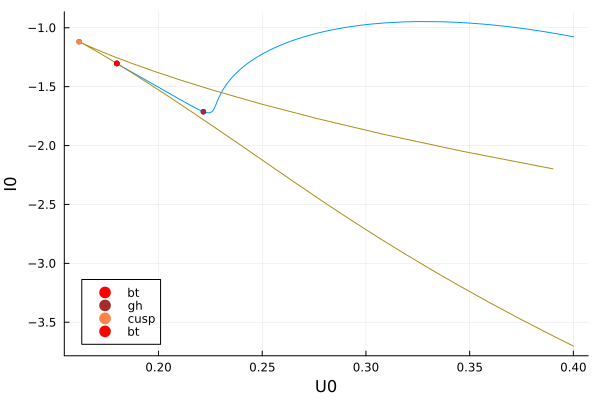

In [17]:
plot(hp_codim2_1)
plot!(sn_codim2_1)

In [28]:
hp_codim2_1

 ┌─ Curve type: HopfCont
 ├─ Number of points: 131
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter U0 starts at 0.1798874870608784, ends at 0.4
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ≈ +0.17988749,                                                                     step =   0
- #  2,       bt at U0 ≈ +0.17988646 ∈ (+0.17988744, +0.17988749), |δp|=5e-08, [converged], δ = ( 0,  0), step =   0, eigenelements in eig[  1], ind_ev =   0
- #  3,       gh at U0 ≈ +0.22163355 ∈ (+0.22163355, +0.22163758), |δp|=4e-06, [converged], δ = ( 0,  0), step =  34, eigenelements in eig[ 35], ind_ev =   0
- #  4, endpoint at U0 ≈ +0.40000000,                                                                     step = 130


In [41]:
sn_codim2_1

 ┌─ Curve type: FoldCont from BogdanovTakens bifurcation point.
 ├─ Number of points: 91
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter U0 starts at 0.39015617400068303, ends at 0.4
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ≈ +0.40000000,                                                                     step =   0
- #  2,     cusp at U0 ≈ +0.16172428 ∈ (+0.16172428, +0.16172428), |δp|=2e-11, [   guessL], δ = ( 0,  0), step =  16, eigenelements in eig[ 17], ind_ev =   0
- #  3,       bt at U0 ≈ +0.17988646 ∈ (+0.17988646, +0.17988647), |δp|=1e-08, [converged], δ = ( 0,  0), step =  44, eigenelements in eig[ 45], ind_ev =   0
- #  4, endpoint at U0 ≈ +0.40000000,                                                                     step =  90


In [42]:
sn_codim2_1

 ┌─ Curve type: FoldCont from BogdanovTakens bifurcation point.
 ├─ Number of points: 91
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter U0 starts at 0.39015617400068303, ends at 0.4
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ≈ +0.40000000,                                                                     step =   0
- #  2,     cusp at U0 ≈ +0.16172428 ∈ (+0.16172428, +0.16172428), |δp|=2e-11, [   guessL], δ = ( 0,  0), step =  16, eigenelements in eig[ 17], ind_ev =   0
- #  3,       bt at U0 ≈ +0.17988646 ∈ (+0.17988646, +0.17988647), |δp|=1e-08, [converged], δ = ( 0,  0), step =  44, eigenelements in eig[ 45], ind_ev =   0
- #  4, endpoint at U0 ≈ +0.40000000,                                                                     step =  90


In [24]:
jldsave("hp_codim2_1.jld2"; hp_codim2_1.I0, hp_codim2_1.U0)

In [25]:
jldsave("sn_codim2_1.jld2"; sn_codim2_1.I0, sn_codim2_1.U0)